<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/10_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_data = pd.read_csv('dataAlter.csv')
home_data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [94]:
X = 'Course'
Y = 'GDP'


useColumns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
target = 'Target'

<Axes: xlabel='Course', ylabel='GDP'>

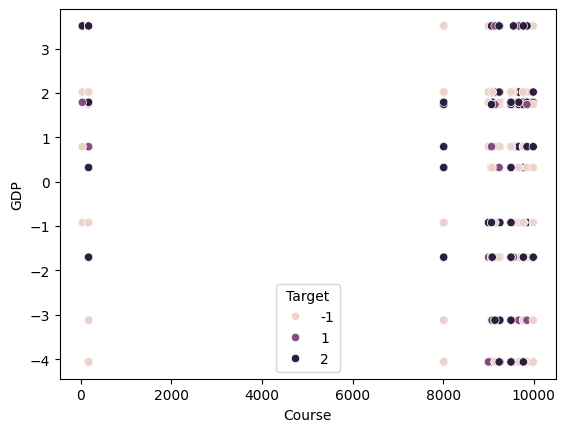

In [95]:

import seaborn as sns

sns.scatterplot(data = home_data, x = X , y = Y, hue = 'Target')


In [96]:
from sklearn.cluster import KMeans

In [97]:
kmeans = KMeans(n_clusters=2,random_state=0 ).fit(home_data[useColumns])

In [99]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

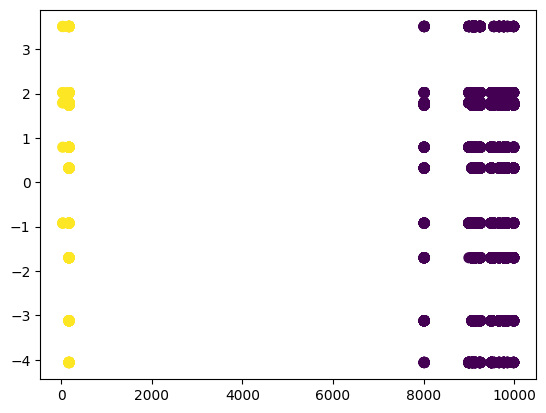

In [98]:
fig, ax = plt.subplots()
ax.scatter(home_data[X], home_data[Y], c=kmeans.labels_, s=50, cmap='viridis')
plt.show()

cluster = 3

In [100]:
kmeans3 = KMeans(n_clusters=3,random_state=0 ).fit(home_data[useColumns])

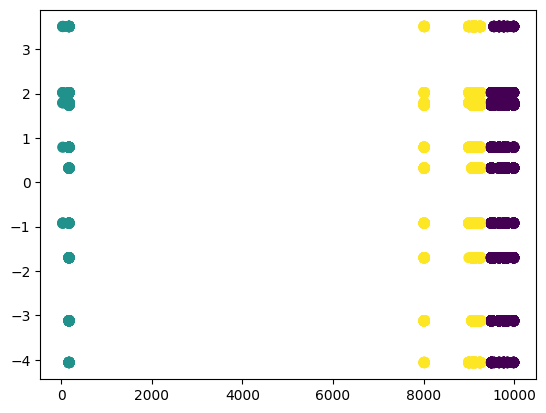

In [101]:
fig, ax = plt.subplots()
ax.scatter(home_data[X], home_data[Y], c=kmeans3.labels_, s=50, cmap='viridis')
plt.show()

Cluster = 4 (melhor considerado em primeiro momento)

In [102]:
kmeans = KMeans(n_clusters=4,random_state=0 ).fit(home_data[useColumns])

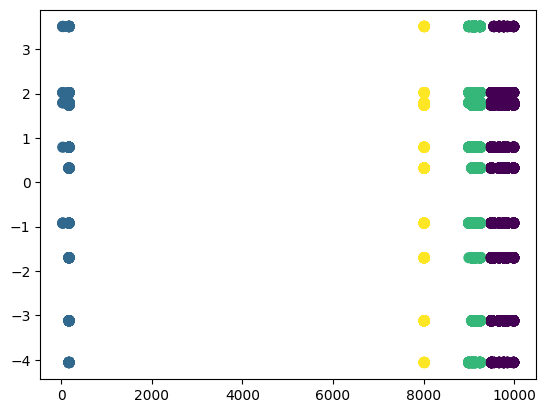

In [103]:
fig, ax = plt.subplots()
ax.scatter(home_data[X], home_data[Y], c=kmeans.labels_, s=50, cmap='viridis')
plt.show()

Descobrindo o melhor valor de K (método do cotovelo)

In [105]:
valores_K = []
inercias = []

for i in range(1,25):
    kmeans = KMeans(n_clusters=i,random_state=0 ).fit(home_data[useColumns])
    valores_K.append(i)
    inercias.append(kmeans.inertia_)


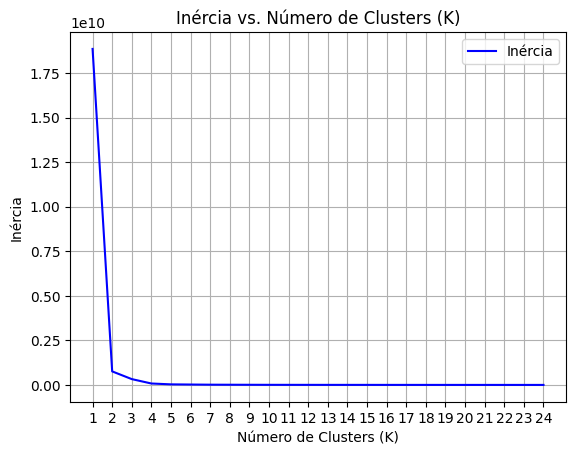

In [106]:
fig, ax = plt.subplots()

ax.plot(valores_K, inercias, linestyle='-', color='b', label='Inércia')

# Adicionando título e rótulos
ax.set_title('Inércia vs. Número de Clusters (K)')
ax.set_xlabel('Número de Clusters (K)')
ax.set_ylabel('Inércia')

ax.set_xticks(valores_K)
# Adicionando gridlines
ax.grid(True)

# Adicionando legenda
ax.legend()

# Exibindo o gráfico
plt.show()

Portanto os melhores foram 2 e o 4, por quanto aos cotovelos

In [107]:
kmeans4 = KMeans(n_clusters=4,random_state=0 ).fit(home_data[useColumns])
kmeans2 = KMeans(n_clusters=2,random_state=0 ).fit(home_data[useColumns])


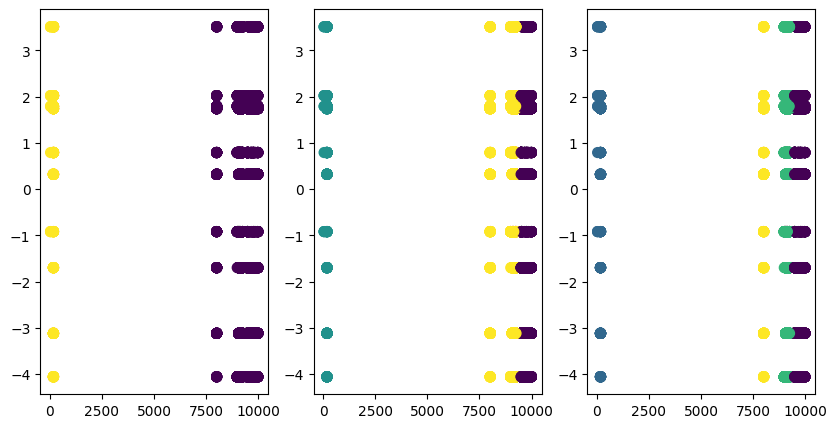

In [108]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].scatter(home_data[X], home_data[Y], c=kmeans2.labels_, s=50)
ax[1].scatter(home_data[X], home_data[Y], c=kmeans3.labels_, s=50)
ax[2].scatter(home_data[X], home_data[Y], c=kmeans4.labels_, s=50)
plt.show()

Coeficiente silhueta (verificar se esta tudo certo)

In [109]:
from sklearn import metrics

metrics.silhouette_score(home_data[useColumns], kmeans2.labels_)


0.9519030181683276

In [110]:
valores_K = []
s = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=0 ).fit(home_data[useColumns])
    valores_K.append(i)
    s.append(metrics.silhouette_score(home_data[useColumns], kmeans.labels_))

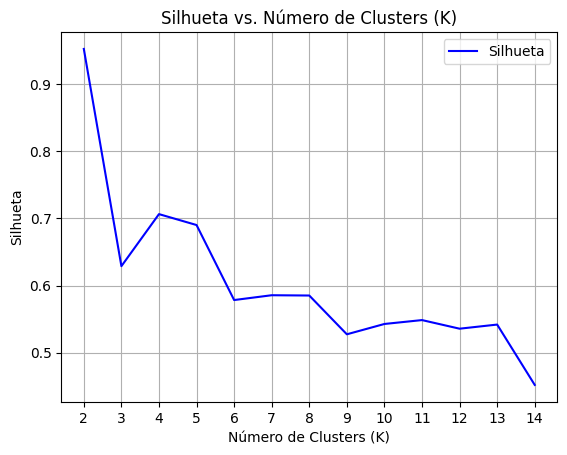

In [114]:
fig, ax = plt.subplots()

ax.plot(valores_K, s, linestyle='-', color='b', label='Silhueta')

# Adicionando título e rótulos
ax.set_title('Silhueta vs. Número de Clusters (K)')
ax.set_xlabel('Número de Clusters (K)')
ax.set_ylabel('Silhueta')

ax.set_xticks(valores_K)
# Adicionando gridlines
ax.grid(True)

# Adicionando legenda
ax.legend()

# Exibindo o gráfico
plt.show()

# **A melhor opção é o K=2**